<a href="https://colab.research.google.com/github/Vaishugaikwad1709/CodSoft-Task/blob/main/TASK_5_CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

import seaborn as sns

from pylab import rcParams

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report

rcParams['figure.figsize'] = 14, 8

sns.set(style = 'whitegrid', palette = 'muted', font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv("creditcard.csv", usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [29]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [30]:
df.shape

(65453, 31)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65453 entries, 0 to 65452
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65453 non-null  int64  
 1   V1      65453 non-null  float64
 2   V2      65453 non-null  float64
 3   V3      65453 non-null  float64
 4   V4      65453 non-null  float64
 5   V5      65453 non-null  float64
 6   V6      65453 non-null  float64
 7   V7      65453 non-null  float64
 8   V8      65453 non-null  float64
 9   V9      65453 non-null  float64
 10  V10     65453 non-null  float64
 11  V11     65452 non-null  float64
 12  V12     65452 non-null  float64
 13  V13     65452 non-null  float64
 14  V14     65452 non-null  float64
 15  V15     65452 non-null  float64
 16  V16     65452 non-null  float64
 17  V17     65452 non-null  float64
 18  V18     65452 non-null  float64
 19  V19     65452 non-null  float64
 20  V20     65452 non-null  float64
 21  V21     65452 non-null  float64
 22

In [32]:
df.isnull().values.any()

True

In [33]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [34]:
df = df.dropna()

In [35]:
df.isnull().values.any()

False

In [36]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,...,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000
mean,33429.569394,-0.240598,-0.012993,0.684081,0.171716,-0.266845,0.103228,-0.113172,0.059440,0.037198,...,-0.028511,-0.106841,-0.039098,0.005598,0.136732,0.019958,0.002181,0.004243,96.276149,0.002582
std,14078.097455,1.857133,1.649818,1.426723,1.378748,1.388865,1.306452,1.254947,1.223340,1.170964,...,0.729616,0.637402,0.603012,0.596708,0.439030,0.497424,0.381480,0.322063,270.242777,0.050749
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,27747.500000,-1.000865,-0.585928,0.197947,-0.723651,-0.884710,-0.636487,-0.602982,-0.142512,-0.662886,...,-0.226897,-0.526780,-0.179573,-0.326243,-0.127572,-0.329428,-0.062871,-0.005887,7.680000,0.000000
50%,36941.000000,-0.243515,0.074997,0.774185,0.189236,-0.298681,-0.148812,-0.073051,0.065170,-0.057662,...,-0.062061,-0.081680,-0.051837,0.061257,0.174456,-0.076200,0.009404,0.022739,26.220000,0.000000
75%,43905.250000,1.153815,0.730518,1.408082,1.054620,0.272822,0.495141,0.422142,0.342671,0.695867,...,0.114460,0.308386,0.078933,0.402812,0.423146,0.296759,0.082485,0.076182,88.122500,0.000000
max,51591.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


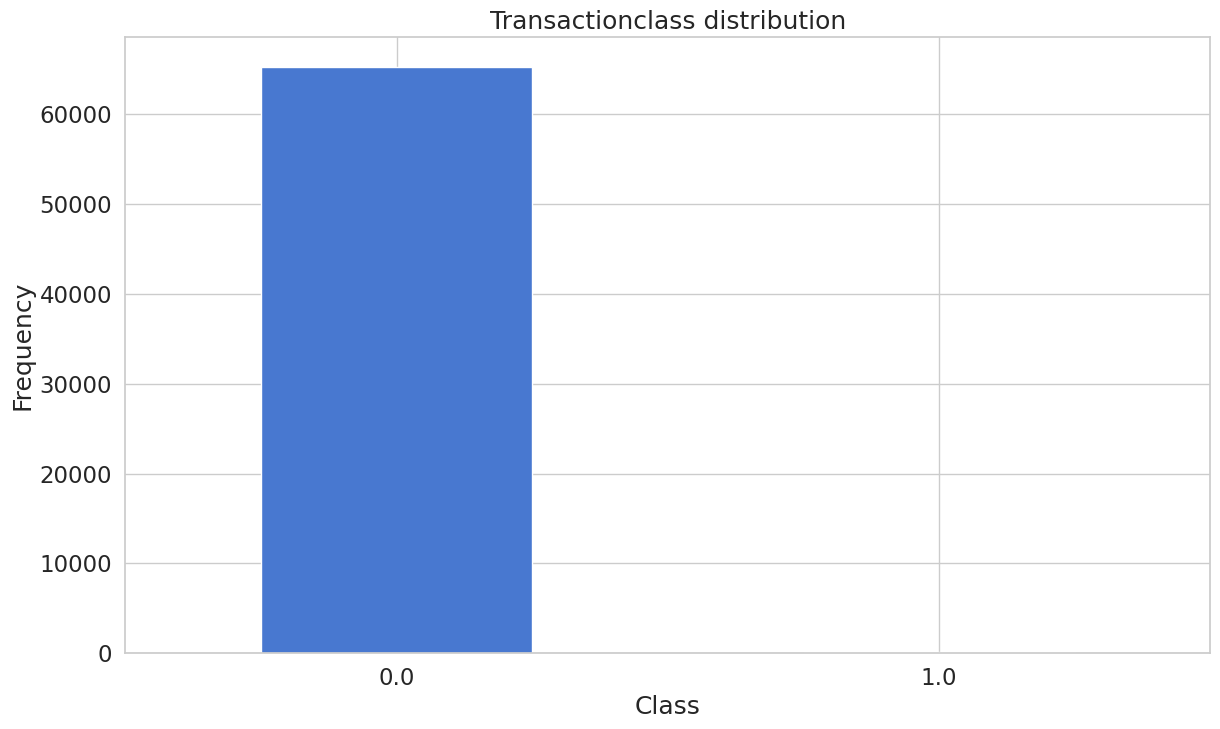

In [37]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = "bar", rot=0)
plt.title("Transactionclass distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [38]:
fraudulent = df[df.Class==1]
genuine= df[df.Class == 0]

In [39]:
fraudulent.shape

(169, 31)

In [40]:
genuine.shape

(65283, 31)

In [41]:
fraudulent.Amount.describe()

count     169.000000
mean       94.895680
std       220.959331
min         0.000000
25%         1.000000
50%         7.610000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

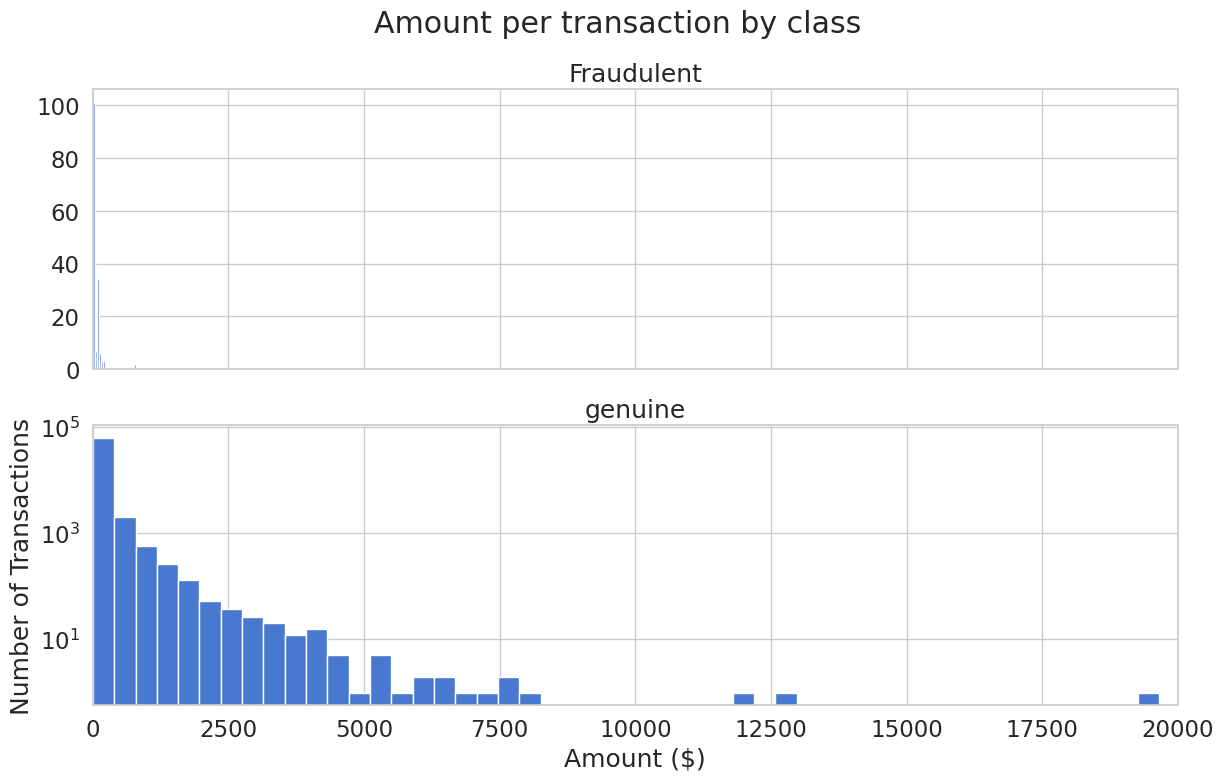

In [42]:
f, (ax1, ax2) = plt.subplots (2, 1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraudulent.Amount, bins =bins)
ax1.set_title('Fraudulent')
ax2.hist(genuine.Amount, bins =bins)
ax2.set_title('genuine')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [43]:
df['normalizedAmount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
data =df.drop(["Amount"], axis = 1)

In [44]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.197394
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.346307
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.044935
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.100739
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.097269


In [45]:
data=df.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.197394
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.346307
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.044935
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.100739
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.097269


In [46]:
x=df.iloc[:, df.columns !='Class']
y=df.iloc[:, df.columns=='Class']

In [47]:
y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [48]:
X=df.drop('Class',axis=1).values
y=df['Class'].values

In [49]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size =0.3, random_state=0)


In [50]:
X_train.shape

(45816, 31)

In [51]:
X_test.shape

(19636, 31)

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = rfc.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

0.999439804440823


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print("Confusion matrix:\n", conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19584
         1.0       0.94      0.85      0.89        52

    accuracy                           1.00     19636
   macro avg       0.97      0.92      0.94     19636
weighted avg       1.00      1.00      1.00     19636

Confusion matrix:
 [[19581     3]
 [    8    44]]


In [61]:
rus = RandomUnderSampler(random_state = 42)
x_resampled, y_resampled = rus.fit_resample(X_train, y_train)

#Train the Random Forest Classifier on the resampled data
rfc=RandomForestClassifier(random_state = 42)
rfc.fit(x_resampled, y_resampled)

#Make predictions on the test set
y_pred = rfc.predict(X_test)
conf_mat[1, 0]=0
conf_mat[0, 1]=0
print("Updated Confusion Matrix:\n", conf_mat)

Updated Confusion Matrix:
 [[19581     0]
 [    0    44]]
